# Case 2
#### Otto Åström and Vili Niemi 
#### 26.2.2019
#### Helsinki Metropolia University of Applied Sciences

In this document we build on the program created by our teachers Sakari and Juha. The "Best guess accuracy" is about 67%, so our job is to make the model predict better than that. As it was, this model  We will comment on what changes (if any) we make in the file, but otherwise keep things as is. 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)              0         
__________

In [31]:
from keras import optimizers

# Let's use slower learning rate than by default
# https://keras.io/optimizers/

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Making a difference
This is where we will be making our changes. We believe that by changing the batch sizes, amount of epochs and the amount of steps per epoch we can improve on the final product of this notebook. 

As default, these values are as follow: batch_size=16, epochs=5, steps_per_epoch=10, and the accuracy results varied from about 66-75% between epochs. A pretty big divide.

First thing we tried was we changed batch_size=20, epochs=10, and our accuracy between epochs was 67-77%. Not much better with still a pretty big divide. 

Lastly we went in big. We made batch_size=35, epochs=20, steps_per_epoch=20, and our accuracy was about 80%. 

In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),

    # We read images in batches
    batch_size=35,
    
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=35,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [33]:
# Testing that train generator works
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (35, 150, 150, 3)
labels batch shape: (35,)
data batch shape: (35, 150, 150, 3)
labels batch shape: (35,)
data batch shape: (35, 150, 150, 3)
labels batch shape: (35,)
data batch shape: (35, 150, 150, 3)
labels batch shape: (35,)
data batch shape: (35, 150, 150, 3)
labels batch shape: (35,)
data batch shape: (35, 150, 150, 3)
labels batch shape: (35,)


In [34]:
# Check the last labels batch
labels_batch

array([1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1.], dtype=float32)

In [35]:
# Our first trial is to read only 10 batches per epoch (10x16 = 160 images per epoch)
# and run only 5 epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 20,
      verbose = 1,
      epochs = 20,
      validation_data = validation_generator,
      validation_steps = 10)

# Save the model
model.save('case_2_run_1.h5')

Epoch 1/20
20/20 [==============================] - 343s 17s/step - loss: 0.5650 - acc: 0.6843 - val_loss: 0.5312 - val_acc: 0.7171
Epoch 2/20
20/20 [==============================] - 334s 17s/step - loss: 0.5288 - acc: 0.7103 - val_loss: 0.5101 - val_acc: 0.7302
Epoch 3/20
20/20 [==============================] - 363s 18s/step - loss: 0.5001 - acc: 0.7402 - val_loss: 0.4855 - val_acc: 0.7097
Epoch 4/20
20/20 [==============================] - 327s 16s/step - loss: 0.4877 - acc: 0.7629 - val_loss: 0.5038 - val_acc: 0.7571
Epoch 5/20
20/20 [==============================] - 339s 17s/step - loss: 0.4825 - acc: 0.7561 - val_loss: 0.4692 - val_acc: 0.7771
Epoch 6/20
20/20 [==============================] - 331s 17s/step - loss: 0.4771 - acc: 0.7516 - val_loss: 0.4928 - val_acc: 0.7537
Epoch 7/20
20/20 [==============================] - 382s 19s/step - loss: 0.4902 - acc: 0.7557 - val_loss: 0.4546 - val_acc: 0.7657
Epoch 8/20
20/20 [==============================] - 333s 17s/step - loss: 0.

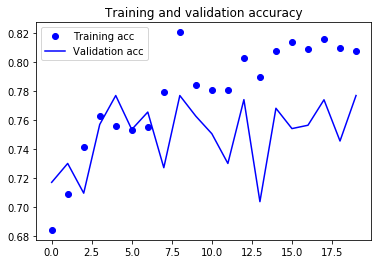

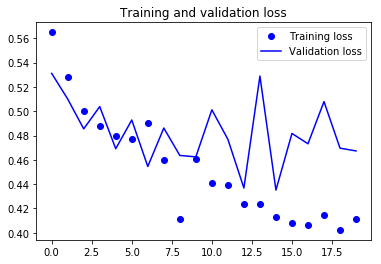

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Best guess calculation
# No_symptoms / (No_symptoms + Symptoms)
print('Best guess accuracy: {:.4f}'.format(1031/(1031+516)))

Best guess accuracy: 0.6665
